# **Exploratory Data Analysis**
The following code aims to gain a better understabding of the kaggle dataset by:


*   Assessing value types.
*   Identify null values.
*   Explore correlations between data points.
*   Inspect features that may casue a departure delay.


In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Read dataset
df = pd.read_csv('/content/drive/MyDrive/Predictive Analysis CA/Predictive Analysis CA/Data/train_val.csv')

In [ ]:
# Display head
df.head(3).transpose()

,0,1,2
MONTH,1,1,1
DAY_OF_WEEK,3,3,5
ORIGIN,BOI,MKE,TUL
DEP_DELAY_NEW,0.0,3.0,0.0
DEP_DEL15,0,0,0
DEP_TIME_BLK,0900-0959,0700-0759,0600-0659
DISTANCE_GROUP,3,4,3
CARRIER_DELAY,NaN,0.0,NaN
WEATHER_DELAY,NaN,3.0,NaN
NAS_DELAY,NaN,75.0,NaN


In [ ]:
# Count of rows and columns
df.shape

(976687, 33)

In [ ]:
# Display data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976687 entries, 0 to 976686
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   MONTH                          976687 non-null  int64  
 1   DAY_OF_WEEK                    976687 non-null  int64  
 2   ORIGIN                         976687 non-null  object 
 3   DEP_DELAY_NEW                  976687 non-null  float64
 4   DEP_DEL15                      976687 non-null  int64  
 5   DEP_TIME_BLK                   976687 non-null  object 
 6   DISTANCE_GROUP                 976687 non-null  int64  
 7   CARRIER_DELAY                  166351 non-null  float64
 8   WEATHER_DELAY                  166351 non-null  float64
 9   NAS_DELAY                      166351 non-null  float64
 10  SECURITY_DELAY                 166351 non-null  float64
 11  LATE_AIRCRAFT_DELAY            166351 non-null  float64
 12  SEGMENT_NUMBER                

In [ ]:
# Statistical description of each column
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MONTH,976687.0,6.677765e+00,3.334984e+00,1.000000,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
DAY_OF_WEEK,976687.0,3.930564e+00,1.995656e+00,1.000000,2.000000e+00,4.000000e+00,6.000000e+00,7.000000e+00
DEP_DELAY_NEW,976687.0,1.310540e+01,4.942179e+01,0.000000,0.000000e+00,0.000000e+00,4.000000e+00,2.710000e+03
DEP_DEL15,976687.0,1.673126e-01,3.732549e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
DISTANCE_GROUP,976687.0,3.200534e+00,1.827887e+00,1.000000,2.000000e+00,3.000000e+00,4.000000e+00,1.100000e+01
CARRIER_DELAY,166351.0,2.076771e+01,7.546231e+01,0.000000,0.000000e+00,0.000000e+00,1.300000e+01,2.695000e+03
WEATHER_DELAY,166351.0,4.046516e+00,3.722920e+01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.575000e+03
NAS_DELAY,166351.0,1.943054e+01,4.743979e+01,0.000000,0.000000e+00,3.000000e+00,2.200000e+01,1.711000e+03
SECURITY_DELAY,166351.0,9.407818e-02,4.620111e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.048000e+03
LATE_AIRCRAFT_DELAY,166351.0,2.767309e+01,5.333586e+01,0.000000,0.000000e+00,4.000000e+00,3.300000e+01,2.010000e+03


In [ ]:
# Count of null values for each entity
total_null_values = df.isnull().sum().sort_values(ascending=False)
print(f"Feature-wise null values: \n{total_null_values}")

Feature-wise null values: 
NAS_DELAY                        810336
LATE_AIRCRAFT_DELAY              810336
CARRIER_DELAY                    810336
WEATHER_DELAY                    810336
SECURITY_DELAY                   810336
FLT_ATTENDANTS_PER_PASS               0
GROUND_SERV_PER_PASS                  0
PLANE_AGE                             0
DEPARTING_AIRPORT                     0
LATITUDE                              0
LONGITUDE                             0
MONTH                                 0
AVG_MONTHLY_PASS_AIRPORT              0
PREVIOUS_AIRPORT                      0
PRCP                                  0
SNOW                                  0
SNWD                                  0
TMAX                                  0
AVG_MONTHLY_PASS_AIRLINE              0
AIRPORT_FLIGHTS_MONTH                 0
AIRLINE_AIRPORT_FLIGHTS_MONTH         0
AIRLINE_FLIGHTS_MONTH                 0
DAY_OF_WEEK                           0
CARRIER_NAME                          0
NUMBER_OF_SEA

In [ ]:
# Percentage of null values for each feature
null_values_percentage = round(total_null_values / df.isnull().count() * 100, 2)
print(f"Feature-wise null values percentage (%):\n{null_values_percentage}")

Feature-wise null values percentage (%):
AIRLINE_AIRPORT_FLIGHTS_MONTH     0.00
AIRLINE_FLIGHTS_MONTH             0.00
AIRPORT_FLIGHTS_MONTH             0.00
AVG_MONTHLY_PASS_AIRLINE          0.00
AVG_MONTHLY_PASS_AIRPORT          0.00
AWND                              0.00
CARRIER_DELAY                    82.97
CARRIER_NAME                      0.00
CONCURRENT_FLIGHTS                0.00
DAY_OF_WEEK                       0.00
DEPARTING_AIRPORT                 0.00
DEP_DEL15                         0.00
DEP_DELAY_NEW                     0.00
DEP_TIME_BLK                      0.00
DISTANCE_GROUP                    0.00
FLT_ATTENDANTS_PER_PASS           0.00
GROUND_SERV_PER_PASS              0.00
LATE_AIRCRAFT_DELAY              82.97
LATITUDE                          0.00
LONGITUDE                         0.00
MONTH                             0.00
NAS_DELAY                        82.97
NUMBER_OF_SEATS                   0.00
ORIGIN                            0.00
PLANE_AGE              

# **Graphical Analysis**
Graphs are used to find relationships between features and their affect on the target variable.

Visualisations used in this section:

*   Heatmaps.
*   Bar charts.
*   Box plots.
*   Scatter plots.
*   Geo mapping.



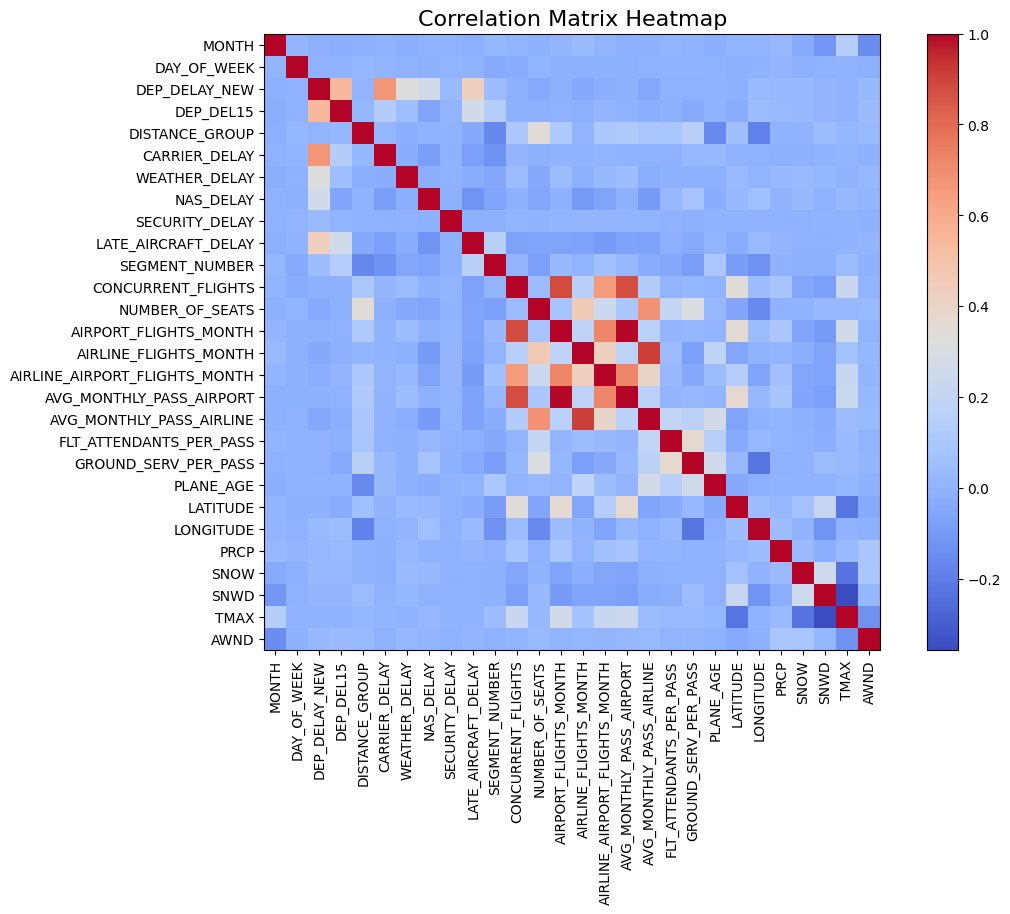

In [ ]:
# Correlation Matrix Heatmap
numerical_data = df.select_dtypes(include=['number'])

correlation_matrix = numerical_data.corr()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

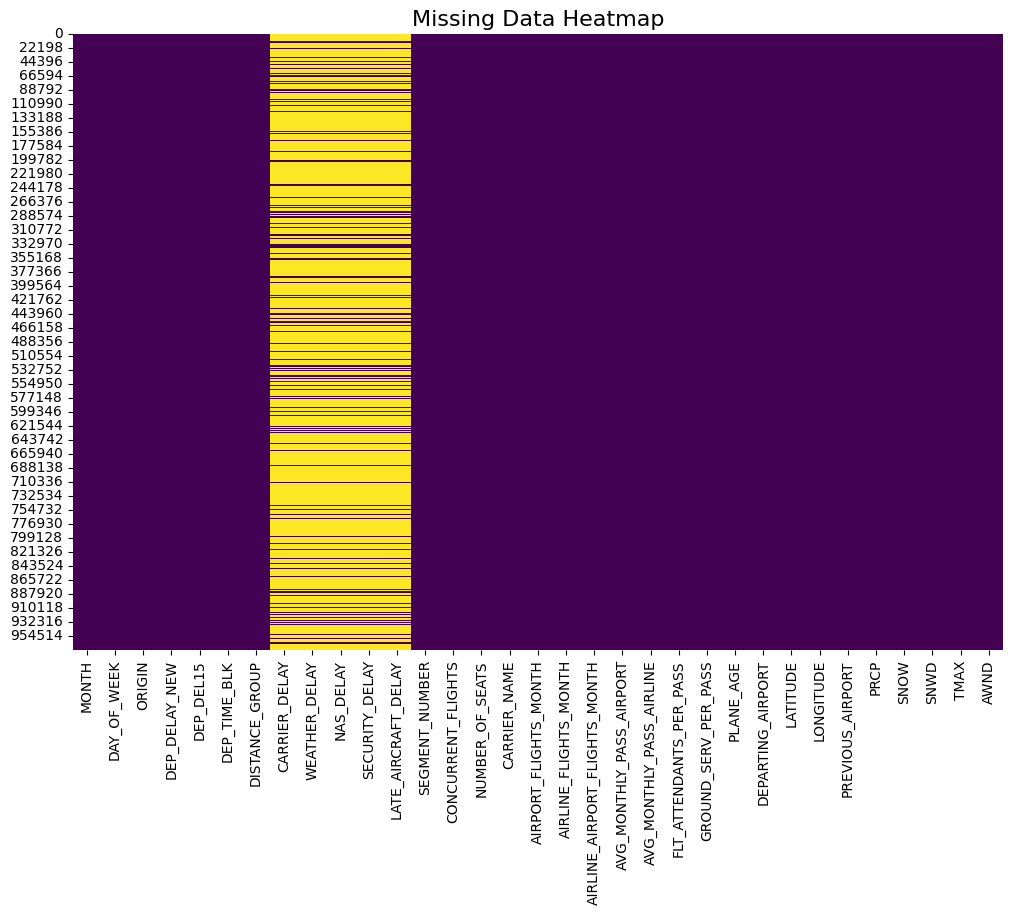

In [ ]:
# Visualising Missing Data
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap", fontsize=16)
plt.show()

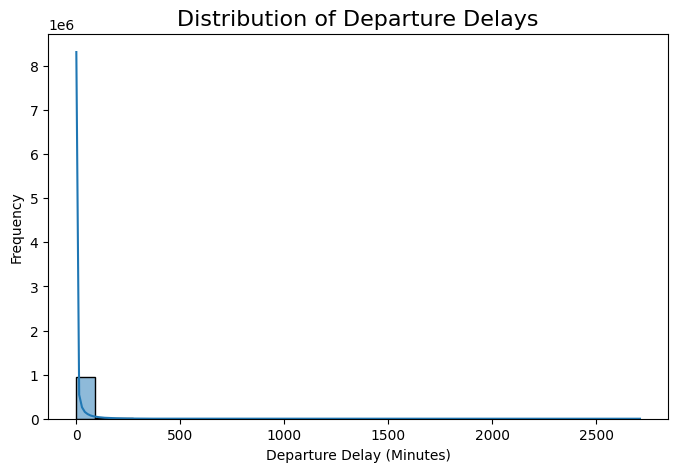

In [ ]:
# Distribution of Delay Times
plt.figure(figsize=(8, 5))
sns.histplot(df['DEP_DELAY_NEW'], bins=30, kde=True)
plt.title("Distribution of Departure Delays", fontsize=16)
plt.xlabel("Departure Delay (Minutes)")
plt.ylabel("Frequency")
plt.show()

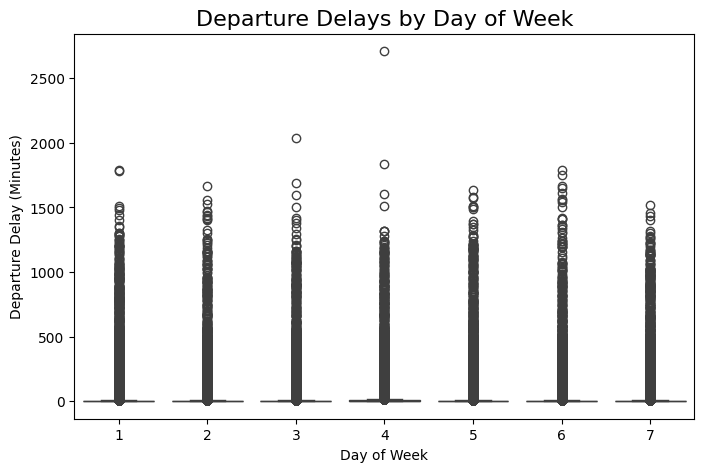

In [ ]:
# Relationship between Delays by Day of Week
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='DAY_OF_WEEK', y='DEP_DELAY_NEW')
plt.title("Departure Delays by Day of Week", fontsize=16)
plt.xlabel("Day of Week")
plt.ylabel("Departure Delay (Minutes)")
plt.show()

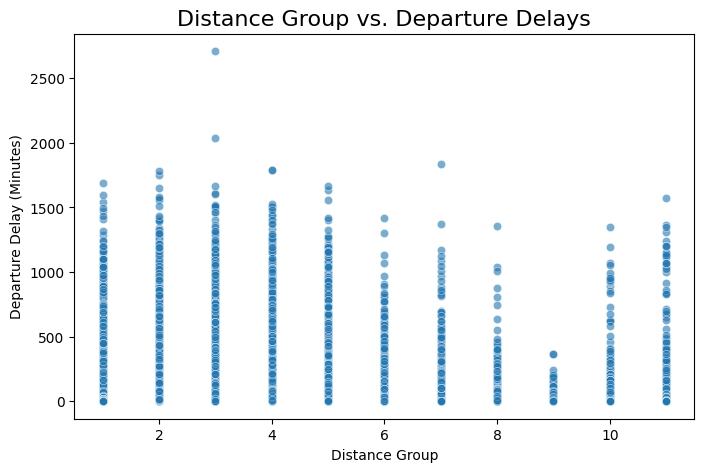

In [ ]:
# Relationship Between Distance and Delays
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='DISTANCE_GROUP', y='DEP_DELAY_NEW', alpha=0.6)
plt.title("Distance Group vs. Departure Delays", fontsize=16)
plt.xlabel("Distance Group")
plt.ylabel("Departure Delay (Minutes)")
plt.show()

In [ ]:
# Filling missing values
df['SECURITY_DELAY'].fillna(0, inplace=True)
df['LATE_AIRCRAFT_DELAY'].fillna(0, inplace=True)
df['CARRIER_DELAY'].fillna(0, inplace=True)
df['WEATHER_DELAY'].fillna(0, inplace=True)
df['NAS_DELAY'].fillna(0, inplace=True)

<ipython-input-15-682042ac0441>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SECURITY_DELAY'].fillna(0, inplace=True)
<ipython-input-15-682042ac0441>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

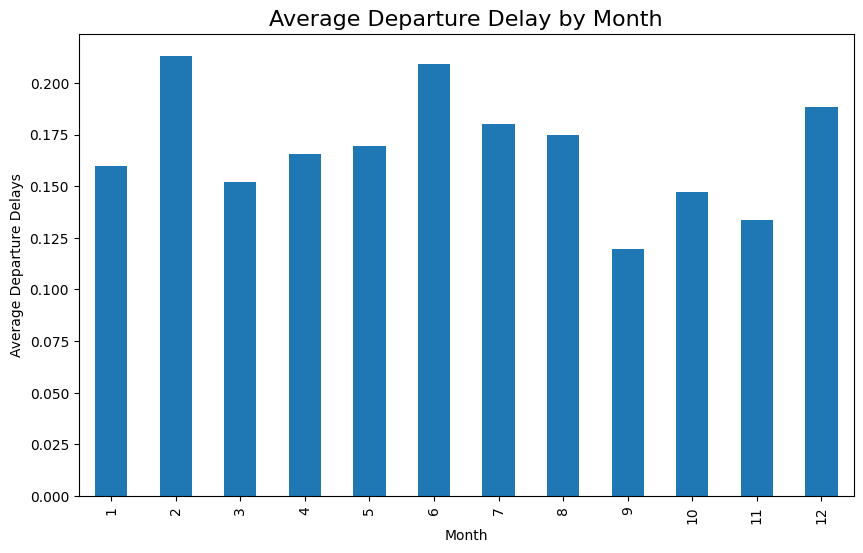

In [ ]:
# Average departure delay by month
plt.figure(figsize=(10, 6))
month_delay_mean = df.groupby('MONTH')['DEP_DEL15'].mean()
month_delay_mean.plot(kind='bar', figsize=(10, 6))
plt.title("Average Departure Delay by Month", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Average Departure Delays")
plt.show()

In [ ]:
# Check if missing values have been addressed
missing_after_treatment = df.isnull().sum()
missing_after_treatment

,0
MONTH,0
DAY_OF_WEEK,0
ORIGIN,0
DEP_DELAY_NEW,0
DEP_DEL15,0
DEP_TIME_BLK,0
DISTANCE_GROUP,0
CARRIER_DELAY,0
WEATHER_DELAY,0
NAS_DELAY,0


In [ ]:
# Check if missing values have been addressed
df.head(3).transpose()

,0,1,2
MONTH,1,1,1
DAY_OF_WEEK,3,3,5
ORIGIN,BOI,MKE,TUL
DEP_DELAY_NEW,0.0,3.0,0.0
DEP_DEL15,0,0,0
DEP_TIME_BLK,0900-0959,0700-0759,0600-0659
DISTANCE_GROUP,3,4,3
CARRIER_DELAY,0.0,0.0,0.0
WEATHER_DELAY,0.0,3.0,0.0
NAS_DELAY,0.0,75.0,0.0


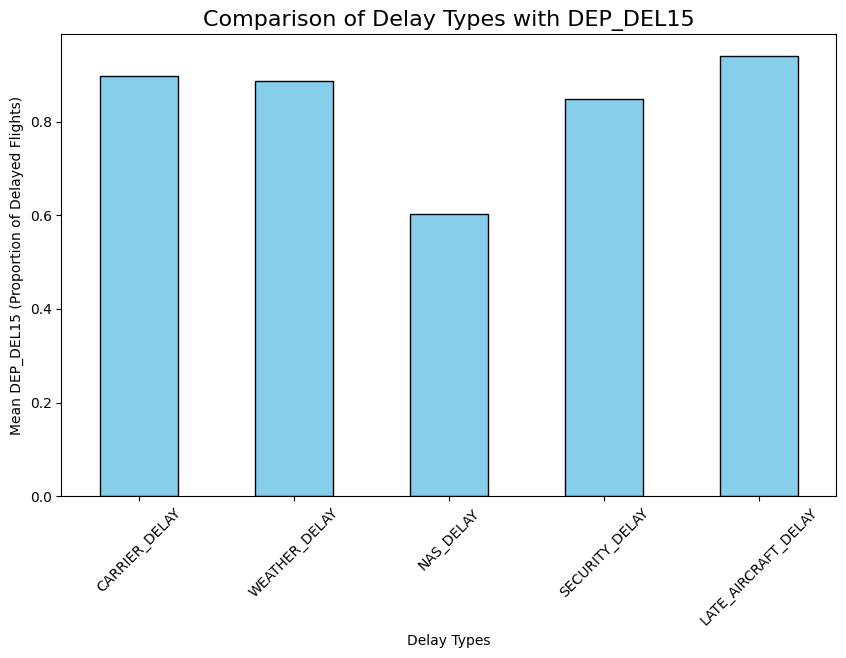

In [ ]:
# Comparing delay types
delay_types = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
mean_dep_del15 = df[delay_types].fillna(0).apply(lambda x: df.loc[x > 0, 'DEP_DEL15'].mean())

# Create a bar chart
plt.figure(figsize=(10, 6))
mean_dep_del15.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Comparison of Delay Types with DEP_DEL15", fontsize=16)
plt.xlabel("Delay Types")
plt.ylabel("Mean DEP_DEL15 (Proportion of Delayed Flights)")
plt.xticks(rotation=45)
plt.show()

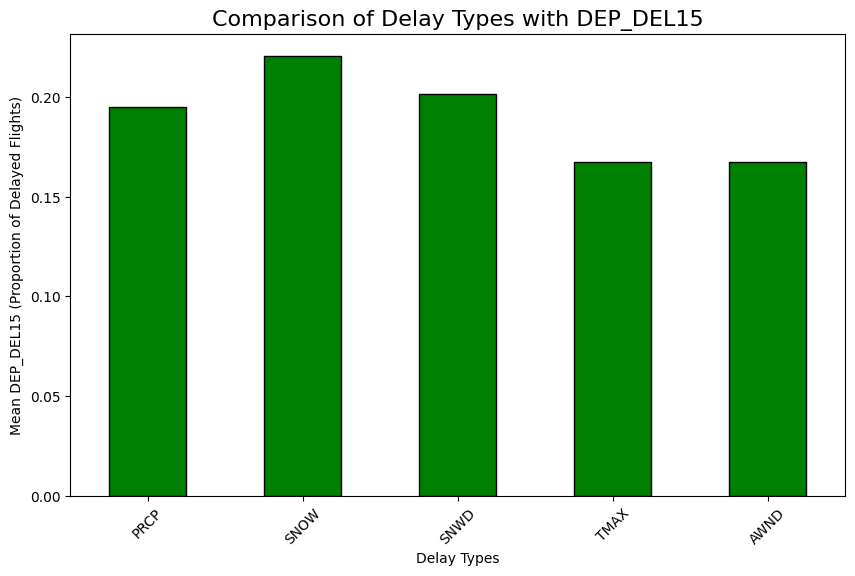

In [ ]:
# Comparing weather types
weather_types = ['PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']
mean_dep_del15 = df[weather_types].fillna(0).apply(lambda x: df.loc[x > 0, 'DEP_DEL15'].mean())

# Create a bar chart
plt.figure(figsize=(10, 6))
mean_dep_del15.plot(kind='bar', color='green', edgecolor='black')
plt.title("Comparison of Delay Types with DEP_DEL15", fontsize=16)
plt.xlabel("Delay Types")
plt.ylabel("Mean DEP_DEL15 (Proportion of Delayed Flights)")
plt.xticks(rotation=45)
plt.show()


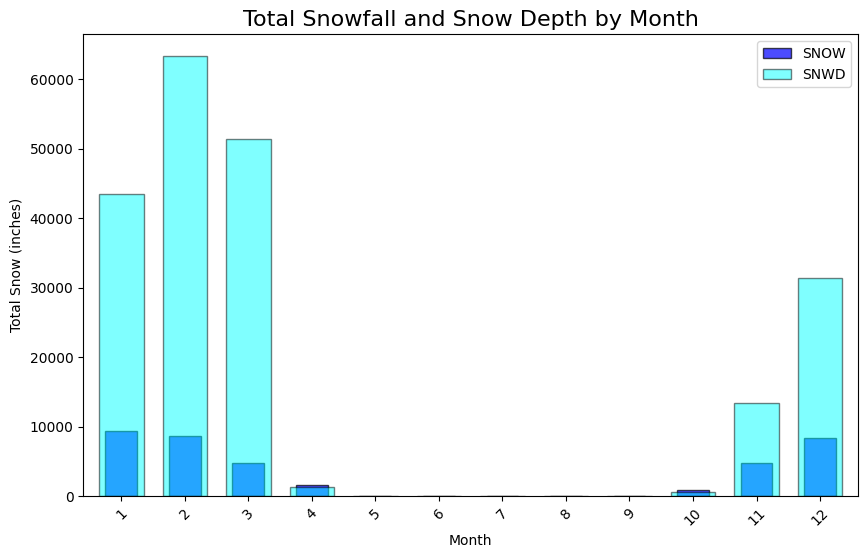

         SNOW     SNWD
MONTH                 
1      9351.3  43440.6
2      8608.1  63278.0
3      4810.8  51425.0
4      1582.3   1266.2
5         0.0      0.0
6         0.0      0.0
7         0.0      0.0
8         0.0      0.0
9         0.0      0.0
10      954.0    583.3
11     4790.7  13404.5
12     8432.3  31346.7


In [ ]:
# Total snowfall and snow depth by month
snow_analysis = df.groupby('MONTH')[['SNOW', 'SNWD']].sum()

# Plot total snow by month
plt.figure(figsize=(10, 6))
snow_analysis['SNOW'].plot(kind='bar', color='blue', edgecolor='black', alpha=0.7, label='SNOW')
snow_analysis['SNWD'].plot(kind='bar', color='cyan', edgecolor='black', alpha=0.5, label='SNWD', width=0.7)
plt.title("Total Snowfall and Snow Depth by Month", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Total Snow (inches)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Display the summary table
print(snow_analysis)


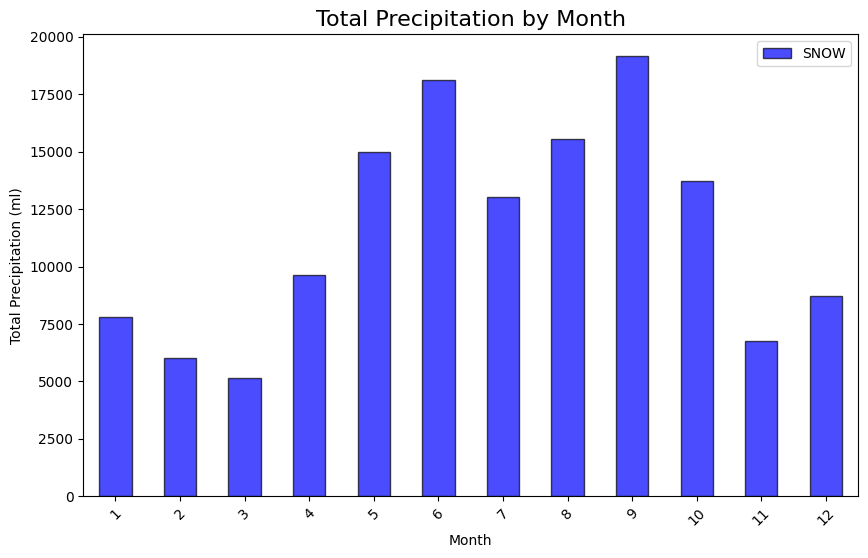

           PRCP
MONTH          
1       7811.19
2       6017.62
3       5131.17
4       9611.99
5      14987.73
6      18129.11
7      13044.23
8      15547.28
9      19155.85
10     13705.86
11      6758.51
12      8712.87


In [ ]:
# Total precipitation by month
precipitation_analysis = df.groupby('MONTH')[['PRCP']].sum()

# Plot total snow by month
plt.figure(figsize=(10, 6))
precipitation_analysis['PRCP'].plot(kind='bar', color='blue', edgecolor='black', alpha=0.7, label='SNOW')
plt.title("Total Precipitation by Month", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Total Precipitation (ml)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Display the summary table
print(precipitation_analysis)

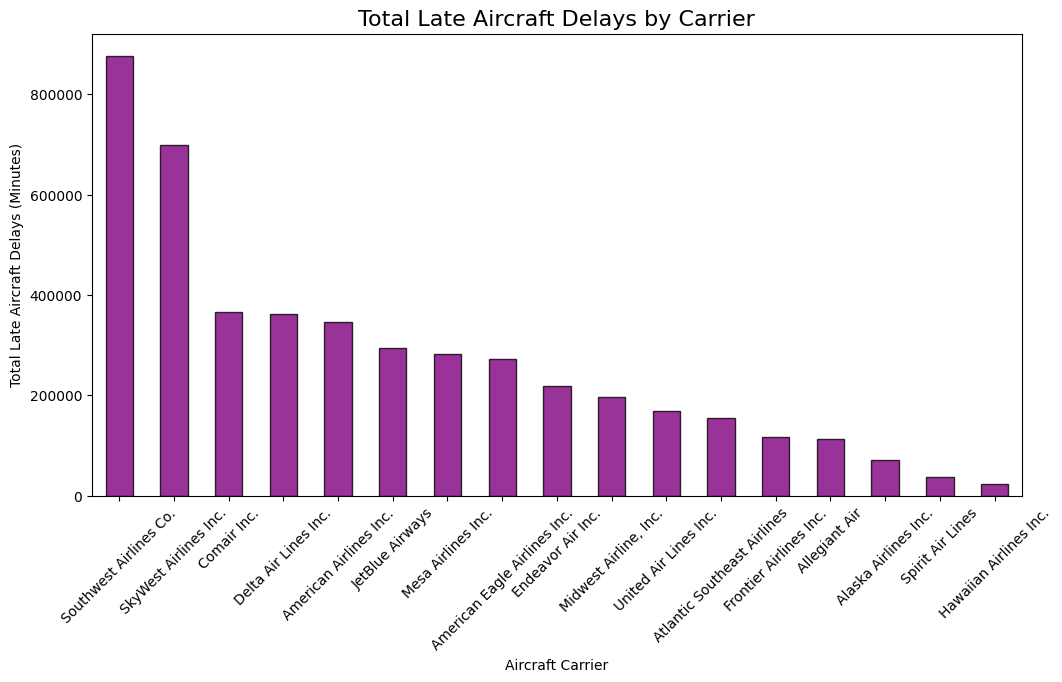

CARRIER_NAME
Southwest Airlines Co.          876496.0
SkyWest Airlines Inc.           699475.0
Comair Inc.                     365177.0
Delta Air Lines Inc.            362290.0
American Airlines Inc.          347040.0
JetBlue Airways                 295009.0
Mesa Airlines Inc.              282593.0
American Eagle Airlines Inc.    271919.0
Endeavor Air Inc.               219251.0
Midwest Airline, Inc.           197041.0
United Air Lines Inc.           168897.0
Atlantic Southeast Airlines     155672.0
Frontier Airlines Inc.          117977.0
Allegiant Air                   113336.0
Alaska Airlines Inc.             70635.0
Spirit Air Lines                 37507.0
Hawaiian Airlines Inc.           23132.0
Name: LATE_AIRCRAFT_DELAY, dtype: float64


In [ ]:
# Total late aircraft delays by carrier
late_aircraft_delays = df.groupby('CARRIER_NAME')['LATE_AIRCRAFT_DELAY'].sum().sort_values(ascending=False)

# Plot total late aircraft delays by carrier
plt.figure(figsize=(12, 6))
late_aircraft_delays.plot(kind='bar', color='purple', edgecolor='black', alpha=0.8)
plt.title("Total Late Aircraft Delays by Carrier", fontsize=16)
plt.xlabel("Aircraft Carrier")
plt.ylabel("Total Late Aircraft Delays (Minutes)")
plt.xticks(rotation=45)
plt.show()

# Display the data for reference
print(late_aircraft_delays)

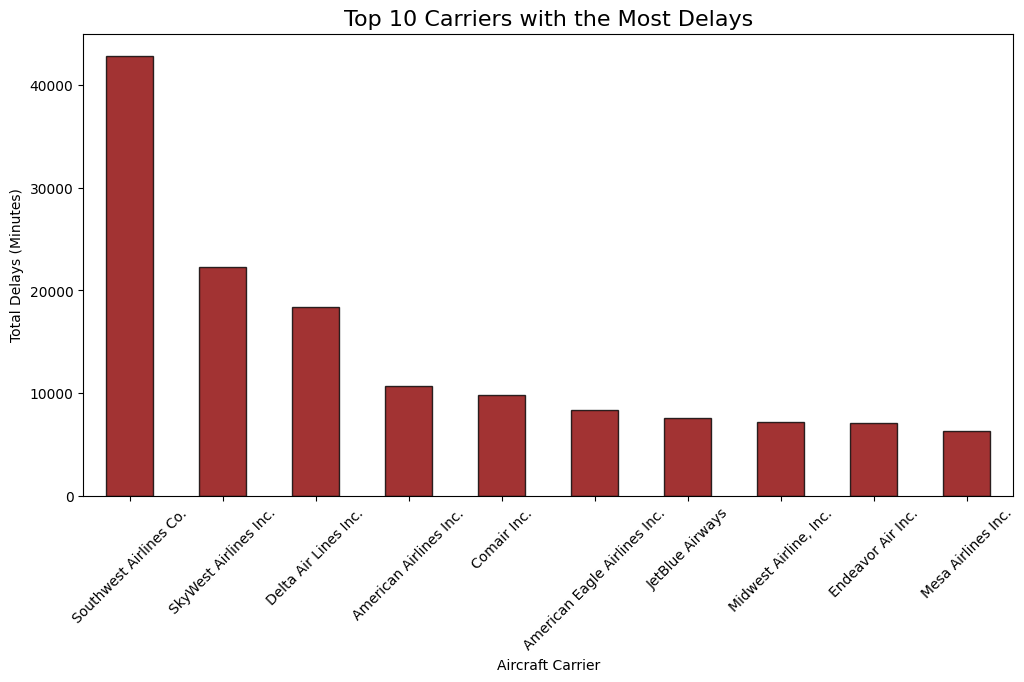

In [ ]:
# Top 10 carriers with the most delays
# Aggregate total delays by carrier
carrier_total_delays = df.groupby('CARRIER_NAME')['DEP_DEL15'].sum().sort_values(ascending=False)

# Get the top 10 carriers
top_ten_carriers = carrier_total_delays.head(10)

# Plot the top 10 carriers with the most delays
plt.figure(figsize=(12, 6))
top_ten_carriers.plot(kind='bar', color='darkred', edgecolor='black', alpha=0.8)
plt.title("Top 10 Carriers with the Most Delays", fontsize=16)
plt.xlabel("Aircraft Carrier")
plt.ylabel("Total Delays (Minutes)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Installing cartopy
pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 102.2 MB/s eta 0:00:00


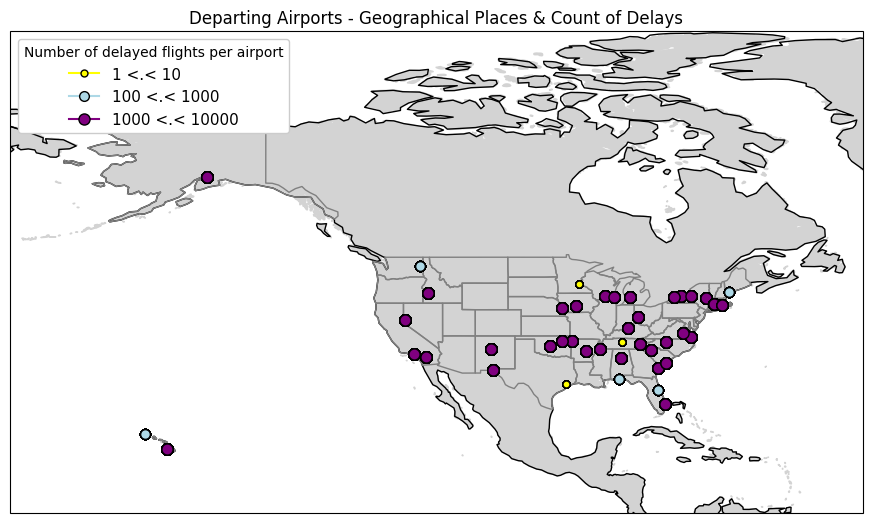

In [ ]:
# Geo plotting airports and their delays
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature, STATES
from collections import OrderedDict

airports = df[['LONGITUDE', 'LATITUDE', 'DEPARTING_AIRPORT']]

delayed_flights = df[df['DEP_DEL15'] == 1]['DEPARTING_AIRPORT'].value_counts()

plt.figure(figsize=(11, 11))
ax = plt.axes(projection=ccrs.PlateCarree())

colors = ['yellow', 'red', 'lightblue', 'purple']
size_limits = [1, 10, 100, 1000, 10000]
labels = []

for i in range(len(size_limits) - 1):
    label = f"{size_limits[i]} <.< {size_limits[i+1]}"
    labels.append(label)

ax.add_feature(NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='lightgray'))
ax.coastlines()
ax.add_feature(STATES, edgecolor='gray')
ax.set_extent([-180, -50, 10, 75])

for index, row in airports.iterrows():
    if row['DEPARTING_AIRPORT'] in delayed_flights.index:
        delay_count = delayed_flights[row['DEPARTING_AIRPORT']]
        isize = [i for i in range(len(size_limits) - 1) if size_limits[i] <= delay_count < size_limits[i + 1]]
        ind = isize[-1] if isize else 0
        ind = min(ind, len(colors) - 1)
        ax.plot(row['LONGITUDE'], row['LATITUDE'], marker='o', markersize=ind + 5, color=colors[ind],
                markeredgewidth=1, markeredgecolor='k', transform=ccrs.Geodetic(), label=labels[ind])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
key_order = [f"{size_limits[i]} <.< {size_limits[i+1]}" for i in range(len(size_limits) - 1)]
new_label = OrderedDict((key, by_label[key]) for key in key_order if key in by_label)

plt.title("Departing Airports - Geographical Places & Count of Delays")
plt.legend(new_label.values(), new_label.keys(), loc='upper left', prop={'size': 11},
           title='Number of delayed flights per airport', frameon=True, framealpha=1)

plt.show()
